In [2]:
!pip install easyocr

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 3.9 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 KB 2.7 MB/s eta 0:00:002.8 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 3.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 2.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 KB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 38.6 MB/s eta 0:00:0031m51.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 29.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 KB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 32.4 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 K

In [15]:
import matplotlib.pyplot as plt
import cv2
import easyocr
from pylab import rcParams
from IPython.display import Image
rcParams['figure.figsize'] = 8, 16
from pathlib import Path
from functools import partial
import requests
import pandas as pd
import urllib
import multiprocessing
import os
import time
from tqdm import tqdm
from PIL import Image

In [30]:
reader = easyocr.Reader(['en', 'fr', 'de', 'es'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

/home/user/.local/lib/python3.10/site-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_mo

In [34]:
def create_placeholder_image(image_save_path):
    try:
        placeholder_image = Image.new('RGB', (100, 100), color='black')
        placeholder_image.save(image_save_path)
    except Exception as e:
        return
    
def download_image(image_link, save_folder, retries=3, delay=3):
    if not isinstance(image_link, str):
        return None

    filename = Path("img.png").name
    image_save_path = os.path.join(save_folder, filename)

    if os.path.exists(image_save_path):
        return Image.open(image_save_path)  # Return the already downloaded image as a PIL image

    for _ in range(retries):
        try:
            urllib.request.urlretrieve(image_link, image_save_path)
            return Image.open(image_save_path)  # Return the downloaded image as a PIL image
        except:
            time.sleep(delay)
    
    create_placeholder_image(image_save_path)  # Create a placeholder image for invalid links/images
    # return Image.open(image_save_path)  # Return the placeholder image as a PIL image



['https://m.media-amazon.com/images/I/61I9XdN6OFL.jpg']


100%|██████████| 1/1 [00:00<00:00, 1878.33it/s]


In [49]:
# Image("train_images/img.png")
data = pd.read_csv("train.csv")
data['text'] = ""
links = data['image_link'].tolist()
download_folder = "train_images"
if not os.path.exists(download_folder):
    os.makedirs(download_folder)

for i, image_link in tqdm(enumerate(links), total=len(links)):
    download_image(image_link, save_folder=download_folder, retries=3, delay=3)
    output = reader.readtext('train_images/img.png')
    os.remove('train_images/img.png')
    text_only = [detection[1] for detection in output]
    output_text = " ".join(text_only)
    data.at[i, 'text'] = output_text

data.to_csv("train_with_text.csv", index=False)

  0%|          | 74/263859 [09:36<571:04:13,  7.79s/it] 


KeyboardInterrupt: 

In [13]:
cord = output[-1][0]

In [14]:
x_min, y_min = [int(min(idx)) for idx in zip(*cord)]

In [15]:
x_max, y_max = [int(max(idx)) for idx in zip(*cord)]

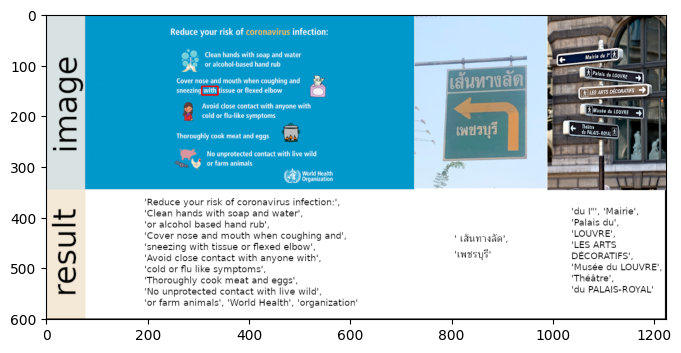

In [16]:
image = cv2.imread('/content/example.png')
cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(0,0,255),2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))